In [12]:
import random

import heavy_tails as hevytail
import linear_unpredictability as linupred
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import real_data_loader
import torch
import visualize_stylized_facts as vsf

## Set seeds for reconstruction of the results

In [13]:
# Set seeds.
SEED = 12345
np.random.seed(SEED)
random.seed(SEED)
torch.manual_seed(SEED)

#### Load Data

Filter out selected times and stocks

In [14]:
real_loader = real_data_loader.RealDataLoader(cache="../data/cache")
real_data = real_loader.get_timeseries(
    col_name="Adj Close", data_path="../data/raw_yahoo_data", update_all=False
)

Cached data found at ../data/cache/time_series_Adj_Close.csv.


Inspect data for missing information

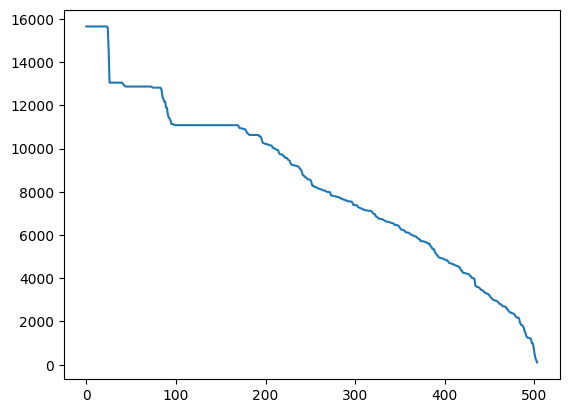

In [15]:
N_STOCKS = 8192
nan_mask = ~np.isnan(real_data)  # returns pd.dataframe
num_non_nans: pd.DataFrame = np.sum(nan_mask, axis=0)
non_nan_orderd_stocks: pd.DataFrame = num_non_nans.sort_values(ascending=False)
plt.plot(non_nan_orderd_stocks.values)
stocks = non_nan_orderd_stocks.iloc[non_nan_orderd_stocks.values >= N_STOCKS].index

MMM     0
CVX     0
MO      0
KO      0
AEP     0
       ..
AZO     0
IDXX    0
AES     0
VRTX    0
ZBRA    0
Length: 258, dtype: int64
Shape: (8192, 258)


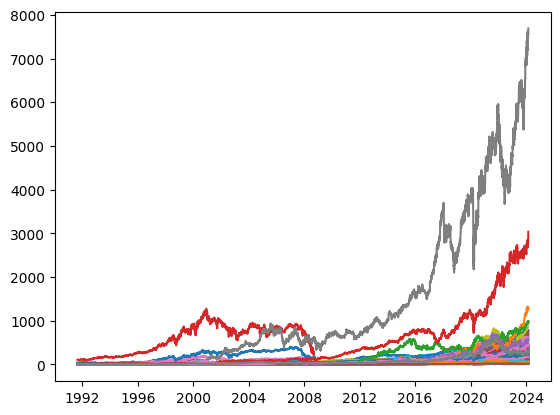

In [16]:
# stocks = ["MSFT", "AAPL", "IBM", "ADBE", "ORCL", "INTC", "AMD", "HPQ"]
# stocks = ['MSFT']
first_date = real_data.index[-N_STOCKS]
real_data = real_data.loc[first_date:, stocks]
print(np.sum(np.isnan(real_data), axis=0))
print(f"Shape: {real_data.shape}")
plt.plot(real_data)
plt.show()

In [17]:
np_data = np.array(real_data)
np_ret = np.log(np_data[1:] / np_data[:-1])

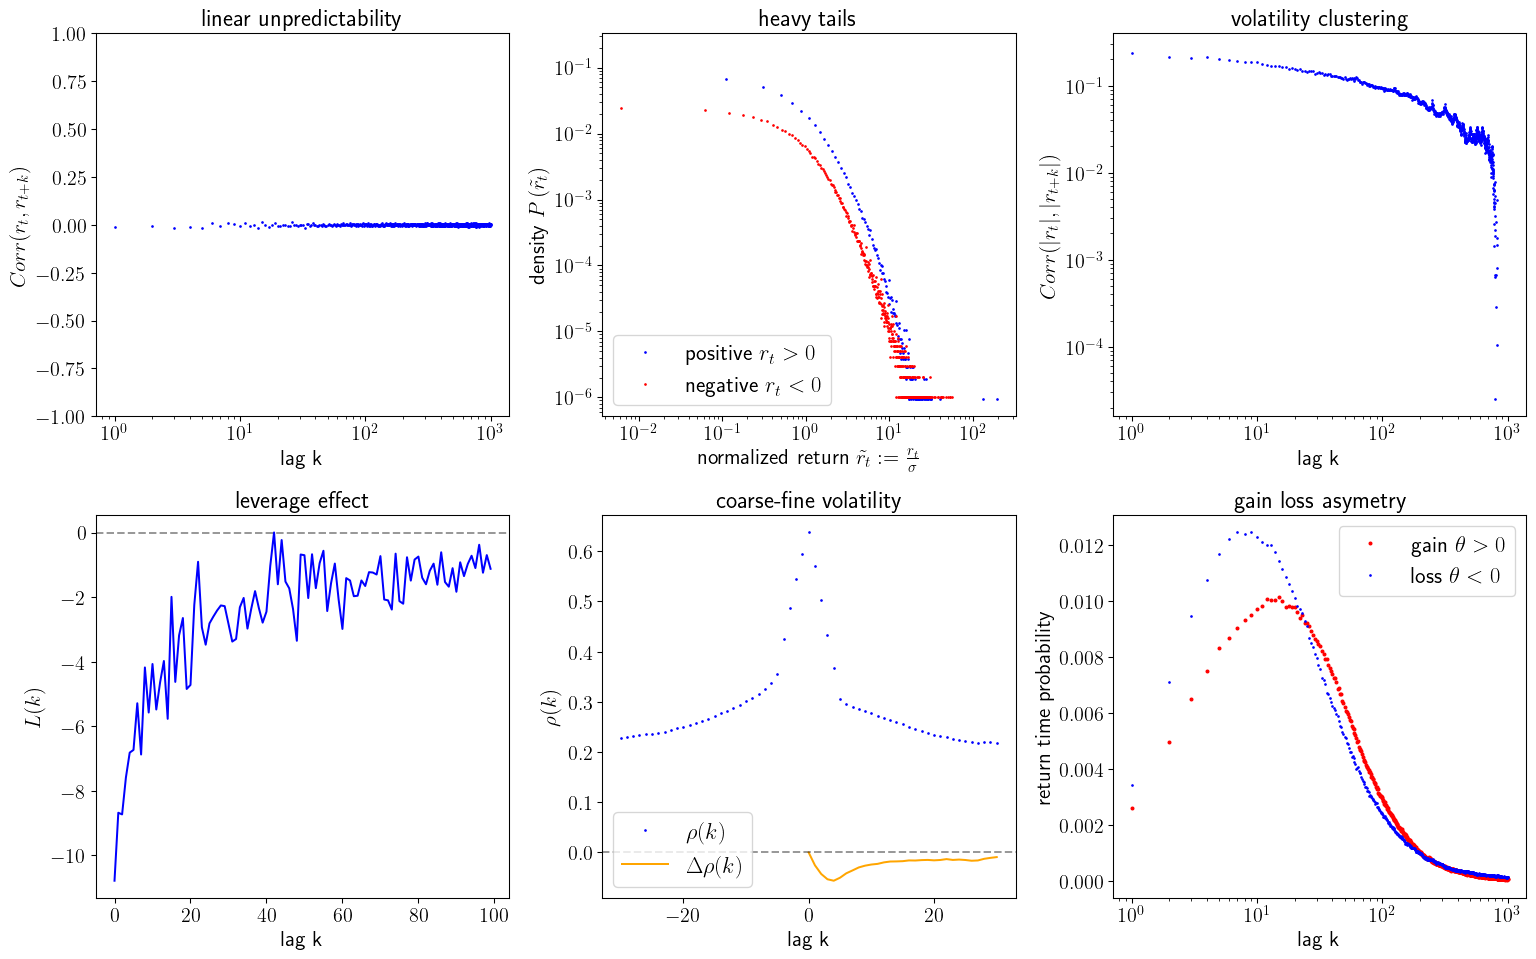

In [18]:
fig = vsf.visualize_stylized_facts(price_data=real_data)
plt.show()

In [21]:
lin_unpred = linupred.linear_unpredictability_statistics(
    log_returns=np_ret, max_lag=1000
)

/tmp/ipykernel_2134252/2012533261.py:4: RuntimeWarning: invalid value encountered in power
  y_lin = np.exp(alpha) * np.power(x_lin, beta)


-4.201216577912739
-2.7615856211235763


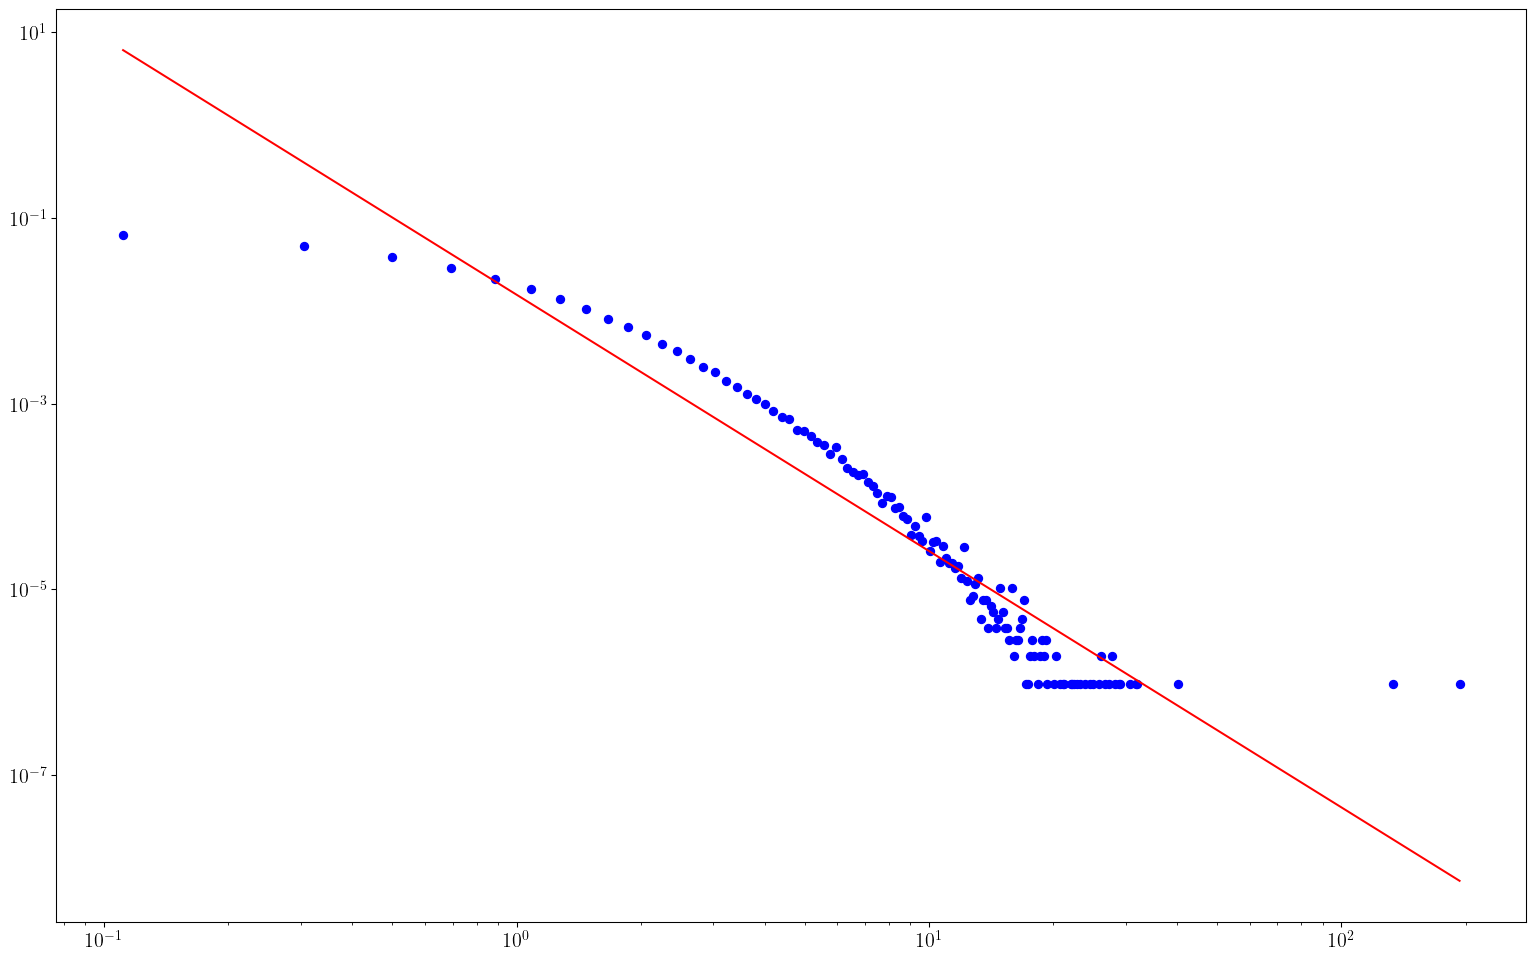

In [25]:
pos_y, pos_x, neg_y, neg_x = hevytail.heavy_tails(log_returns=np_ret, n_bins=1000)
alpha, beta, r = hevytail.fit_powerlaw(pos_x, pos_y)
x_lin = np.linspace(np.min(pos_x), np.max(pos_x), num=1000)
y_lin = np.exp(alpha) * np.power(x_lin, beta)
print(alpha)
print(beta)

plt.plot(pos_x, pos_y, c="blue", linestyle="none", marker="o")
plt.plot(x_lin, y_lin, c="red")
plt.yscale("log")
plt.xscale("log")
plt.show()